# Large Scale Distributed Systems

Graphs formed by random preferential attachment will exhibit hub nodes
that have significantly more connections that other nodes. In these graphs the
degree distribution forms a power law. Such graphs can be formed by biasing
the probability of choosing a given edge target by the degree of that target.

In [1]:
import networkx as nx
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## First Exercise

Construct a graph that starts from a set of unconnected vertices and
that (instead of the uniform random selection in the previous exercise)
preferentially selects two vertices and connects them. Observe how the
number of edges needed to form a connected component changes with
respect to the previous exercise. Check the degree distribution of the
resulting graph once a single connected component is established.


In [2]:
def experiment1(n_nodes):
    graph = nx.Graph()
    for i in range(n_nodes):
        graph.add_node(i)

    while not nx.is_connected(graph):
        possible = list(nx.non_edges(graph))
        degrees = sum([graph.degree[x] for x in range(graph.number_of_nodes())])

        if degrees < 1:
            edge = random.choice(possible)
        else:
            probabilities = [graph.degree[x] for (x, y) in possible]
            if sum(probabilities) == 0.0:
                edge = random.choice(possible)
            else:
                probabilities = [x / sum(probabilities) for x in probabilities]
                edge = possible[np.random.choice(len(possible), p=probabilities)]

        graph.add_edge(edge[0], edge[1])

    return graph

NODES: 5 - EDGES: 5.90
NODES: 6 - EDGES: 9.02
NODES: 7 - EDGES: 13.02
NODES: 8 - EDGES: 18.18
NODES: 9 - EDGES: 25.16
NODES: 10 - EDGES: 30.26
NODES: 11 - EDGES: 37.40
NODES: 12 - EDGES: 44.90
NODES: 13 - EDGES: 55.06
NODES: 14 - EDGES: 67.44
NODES: 15 - EDGES: 79.22
NODES: 16 - EDGES: 90.00
NODES: 17 - EDGES: 105.90
NODES: 18 - EDGES: 120.60
NODES: 19 - EDGES: 128.84
NODES: 20 - EDGES: 153.46
NODES: 21 - EDGES: 163.50
NODES: 22 - EDGES: 182.14
NODES: 23 - EDGES: 208.88
NODES: 24 - EDGES: 223.86
NODES: 25 - EDGES: 251.68
NODES: 26 - EDGES: 265.54
NODES: 27 - EDGES: 301.70
NODES: 28 - EDGES: 308.00
NODES: 29 - EDGES: 334.34


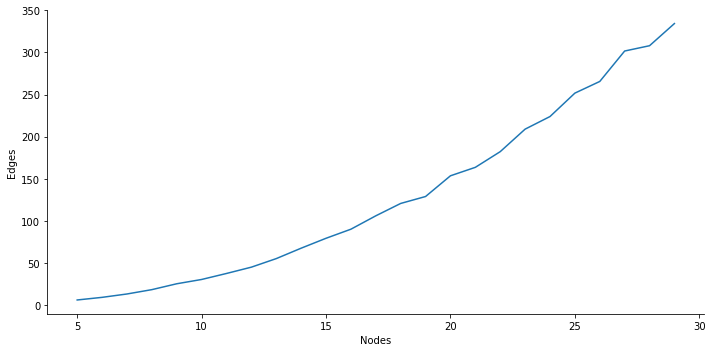

In [3]:
nodes = [i for i in range(5, 30)]
samples = 50
edges = []

for n in nodes:
    total_edges = 0.0
    for i in range(samples):
        total_edges += experiment1(n).number_of_edges()
    edges.append(total_edges / samples)
    print("NODES: %d - EDGES: %.2f" % (n, edges[-1]))

df = pd.DataFrame()
df['Nodes'] = nodes
df['Edges'] = edges

sns.relplot(
    data=df,
    x="Nodes", y="Edges",
    kind="line", height=5, aspect=2
)

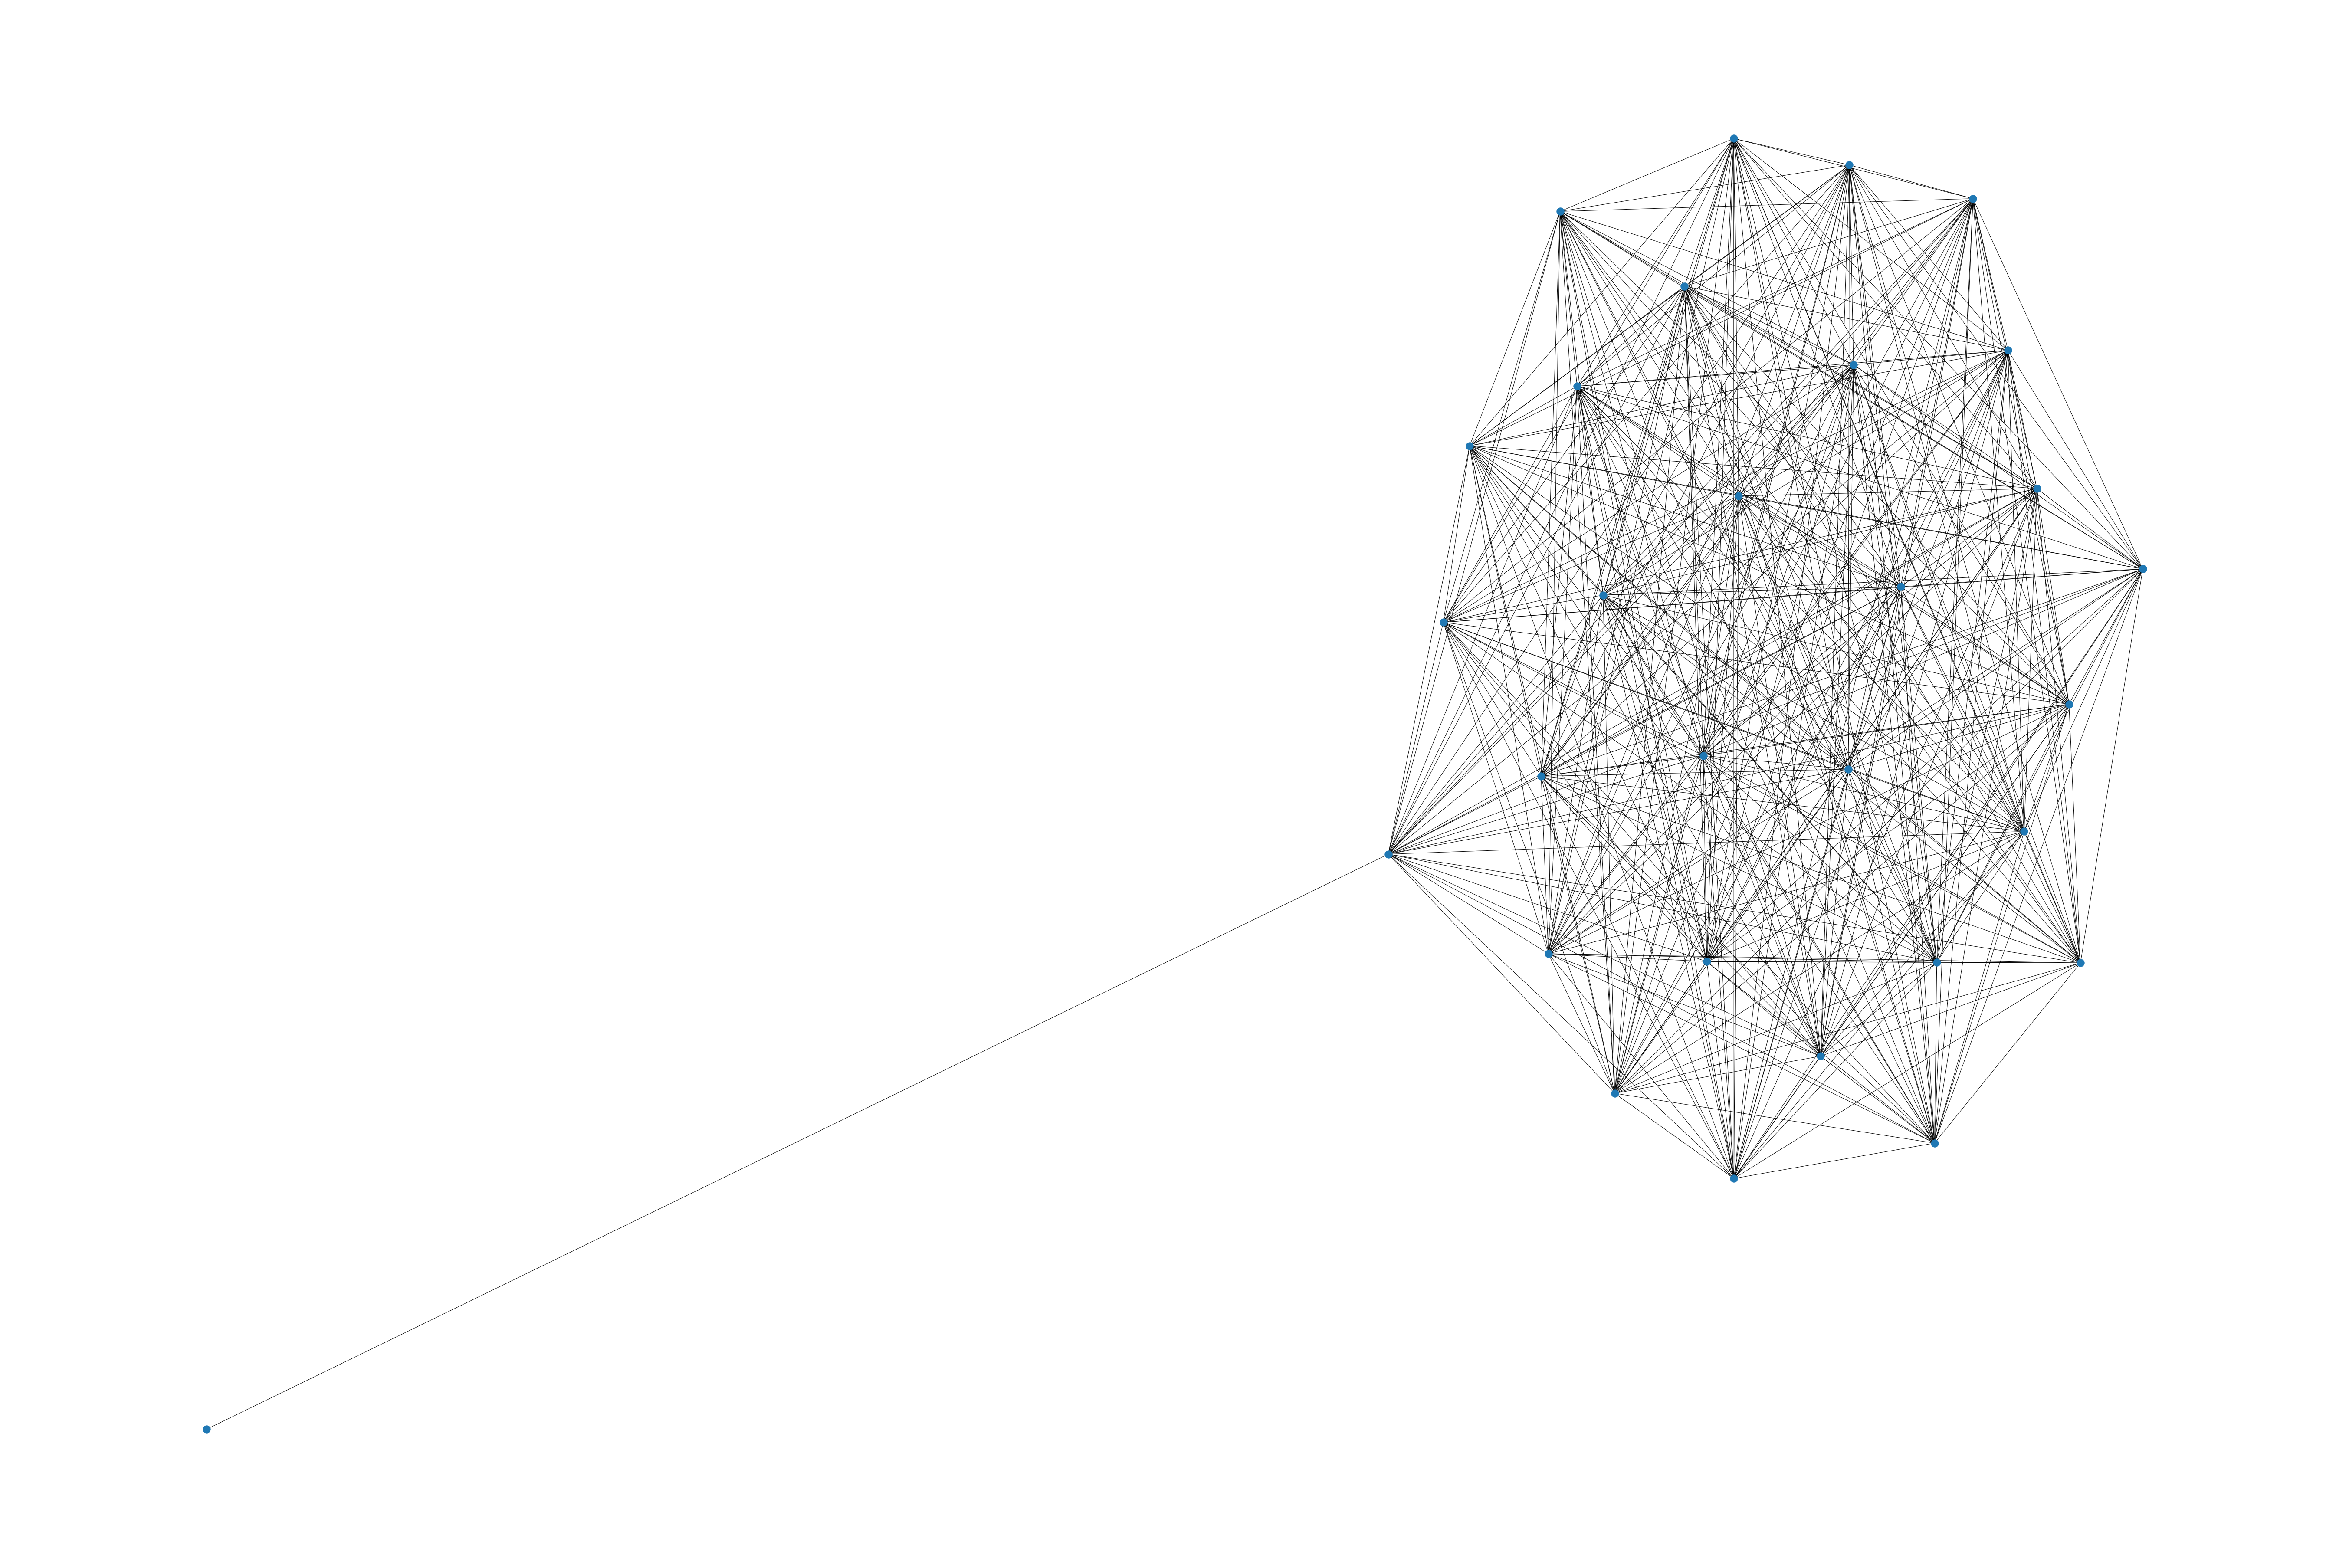

In [6]:
graph = experiment1(30)

fig = plt.figure(1, figsize=(75, 50))
nx.draw(graph)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

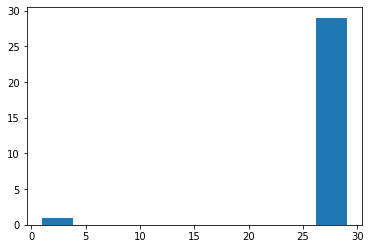

In [7]:
data = [graph.degree[x] for x in range(graph.number_of_nodes())]

plt.hist(data)